## What is the NFL Draft?
<img src="NFL_Draft.jpg" width="800" height="400">

 ### The National Football League Draft, also called the NFL Draft or (officially) the Player Selection Meeting, is an annual event which serves as the league's most common source of player recruitment. Each team is given a position in the drafting order in reverse order relative to its record in the previous year, which means that the last place team is positioned first and the Super Bowl champion is last. From this position.
 
### the team can either select a player or trade its position to another team for other draft positions, a player or players, or any combination thereof. The round is complete when each team has either selected a player or traded its position in the draft.   

## List of of abbreviations: 
 
### Arm Strength (ARM) : The Raw Arm Strength Of The Quarterback
 ### Quick Accuracy (QAC) : Accuracy In The Quck Passing Game
 ### Impact Accuracy (IAC) : Accuracy On High Difficulty, "NFL" Throws
 ### Off Platform Accuracy (OPA) : Accuracy On Off Platform Throws
 ### Processor (PRS) : Ability To Process Defenses Before/After The Snap, Make Correct Reads, & Not Create Turnovers Off Of Bad Reads
 ### Decision Making (DEC) : Ability To Make Good Decisions With The Football After First Read & Limit Turnovers After First Read
 ### Pocket Sense (PKS) : Ability To Sense Pressure & Manipulate The Pocket To Extend Plays
 ### Play Extension (PEX) : Ability To Make Plays Out Of The Pocket 

In [1]:
# Import necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.pipeline import Pipeline 
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
import re
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
# Load the TFG datasets of QBS in each of the three years
Qb_2022 = pd.read_csv('TFG/TFGs 2022 NFL Draft Board - QBs.csv') 
Qb_2021 = pd.read_csv('TFG/TFGs 2021 NFL Draft Board - QBs.csv') 
Qb_2020 = pd.read_csv('TFG/TFGs 2020 NFL Draft Board - QBs.csv') 


## We will evaluate 20 quarterbacks in each draft class to ensure that the numbers are fair across the draft classes.

### Why? if Marcus (aka TFG) scouted 20 QBs in 2022 class and last year (draft class 2021) he did 23 QBs, the stats will be skewed since the three additional quarterbacks he evaluated were largely 7th round or undrafted players.

In [3]:
Qb_2022

,Ranking,Name,HT,WT,Class,School,OVR Overall Grade,IMP,POT,RD Round Grade,...,ACC Acceleration,40 Time,3 Cone,Shuttle,BJ,VJ,Comparison,STR & WKN,Description,Rating
0,1,Kenny Pickett,6'3,217,SR (RS),Pittsburgh,6.35,71,79,01-Feb,...,86,NaN,NaN,NaN,NaN,NaN,Some cross of Drew Lock and Derek Carr,Strengths\n• Has quick twitch athleticism to b...,Pickett projects nicely as a mid tier Quarterb...,71
1,2,Desmond Ridder,6'3,207,SR (RS),Cincinnati,6.30,69,78,2nd,...,87,NaN,NaN,NaN,NaN,NaN,Innacurate Dak Prescott,Strengths\n• Quick release and ball handling a...,Ridder is a quick operating point guard style ...,69
2,3,Sam Howell,6'0,220,JR,UNC,6.27,67,84,2nd,...,88,NaN,NaN,NaN,NaN,NaN,Mitch Trubisky,Strengths\n• Great quick twitch athleticism an...,Howell is an erratic Quarterback who’s poor su...,67
3,4,Matt Coral,6'2,205,JR (RS),Ole Miss,6.26,66,84,2nd,...,86,NaN,NaN,NaN,NaN,NaN,NaN,"Strengths\n• Exceptional arm talent, throws a ...",Corral is a polarizing Quarterback prospect wi...,66
4,5,Malik Willis,6'0,220,JR (RS),Liberty,6.25,65,87,2nd,...,90,NaN,NaN,NaN,NaN,NaN,More accurate Jalen Hurts,Strengths\n• Has plus traits in both athletici...,Willis is the definition of a boom or bust Qua...,65
5,6,Carson Strong +,6'4,224,JR (RS),Nevada,6.22,69,82,02-Mar,...,77,NaN,NaN,NaN,NaN,NaN,Carson Palmer,Strengths\n• Shows flashes of exceptional arm ...,Strong is a highly polarizing QB prospect for ...,69
6,7,Bailey Zappe,6'3,213,SR (GR),Western Kentucky,5.95,63,74,05-Jul,...,78,NaN,NaN,NaN,NaN,NaN,NaN,Strengths\n•\tOperates efficiently in the quic...,Zappe is a prototype backup Quarterback. He ha...,63
7,8,Brock Purdy,6'1,220,SR,Iowa State,5.91,62,72,06-Jul,...,85,NaN,NaN,NaN,NaN,NaN,Case Keenum,Strengths\n•\tHas a lightning quick release an...,Watching Brock Purdy can often be a painful ex...,62
8,9,Chase Garbers,6'2,225,SR (RS),California,5.90,61,73,06-Jul,...,80,NaN,NaN,NaN,NaN,NaN,NaN,Strengths\n•\tHas good speed to break the pock...,Garbers is a likely career backup due to a not...,61
9,10,Cole Kelley,"6'6.5""",248,SR (TR),SE Louisianna,5.80,57,78,06-Jul,...,74,NaN,NaN,NaN,NaN,NaN,NaN,Strengths\n•\tMassive frame at over 6'6 250 lb...,Kelley left Arkansas as a sophomore after not ...,57


## Data Preprocessing

In [4]:
# Renaming the columns to make them more easily identifiable
Qb_2022.rename(columns = {'OVR                            Overall Grade':'OVR', 'RD               Round Grade':'RD'
                         ,'ARM                      Arm Strength':'ARM', 'QAC                Quick Accuracy':'QAC'
                         ,'IAC                    Impact Acc.':'IAC'
                         ,'OPA                          Off Platform Accuracy':'OPA'
                         ,'DEC                                  Decision Making':'DEC'
                         ,'PKS                      Pocket Sense':'PKS'
                         ,'PEX                             Play Extension':'PEX'
                         ,'REL                                      Release':'REL'
                         ,'SPD                   Speed':'SPD'
                         ,'COD                  (Change of Direction)':'COD'
                         ,'ACC                                Acceleration':'ACC'
                         ,'PRS                                   Processor':'PRS'
                         ,'Scheme Fit':'Scheme'},
               inplace = True)

In [5]:
Qb_2022.head()

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,ACC,40 Time,3 Cone,Shuttle,BJ,VJ,Comparison,STR & WKN,Description,Rating
0,1,Kenny Pickett,6'3,217,SR (RS),Pittsburgh,6.35,71,79,01-Feb,...,86,NaN,NaN,NaN,NaN,NaN,Some cross of Drew Lock and Derek Carr,Strengths\n• Has quick twitch athleticism to b...,Pickett projects nicely as a mid tier Quarterb...,71
1,2,Desmond Ridder,6'3,207,SR (RS),Cincinnati,6.30,69,78,2nd,...,87,NaN,NaN,NaN,NaN,NaN,Innacurate Dak Prescott,Strengths\n• Quick release and ball handling a...,Ridder is a quick operating point guard style ...,69
2,3,Sam Howell,6'0,220,JR,UNC,6.27,67,84,2nd,...,88,NaN,NaN,NaN,NaN,NaN,Mitch Trubisky,Strengths\n• Great quick twitch athleticism an...,Howell is an erratic Quarterback who’s poor su...,67
3,4,Matt Coral,6'2,205,JR (RS),Ole Miss,6.26,66,84,2nd,...,86,NaN,NaN,NaN,NaN,NaN,NaN,"Strengths\n• Exceptional arm talent, throws a ...",Corral is a polarizing Quarterback prospect wi...,66
4,5,Malik Willis,6'0,220,JR (RS),Liberty,6.25,65,87,2nd,...,90,NaN,NaN,NaN,NaN,NaN,More accurate Jalen Hurts,Strengths\n• Has plus traits in both athletici...,Willis is the definition of a boom or bust Qua...,65


### We can see a tiny Plus next to certain names, which indicates that there is injury history; thus, we will construct a new column called injury history; it will be a binary column;either you have injury history or you don't.

In [6]:
# Using DataFrame.insert() to add the injury history column
Qb_2022.insert(31, "Injury History", ['No', 'No', 'No', 'No', 'No', 'Yes' , 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'
                                , 'No', 'No', 'No', 'No', 'Yes'], True)

In [7]:
Qb_2022.head()

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,40 Time,3 Cone,Shuttle,BJ,VJ,Comparison,STR & WKN,Description,Injury History,Rating
0,1,Kenny Pickett,6'3,217,SR (RS),Pittsburgh,6.35,71,79,01-Feb,...,NaN,NaN,NaN,NaN,NaN,Some cross of Drew Lock and Derek Carr,Strengths\n• Has quick twitch athleticism to b...,Pickett projects nicely as a mid tier Quarterb...,No,71
1,2,Desmond Ridder,6'3,207,SR (RS),Cincinnati,6.30,69,78,2nd,...,NaN,NaN,NaN,NaN,NaN,Innacurate Dak Prescott,Strengths\n• Quick release and ball handling a...,Ridder is a quick operating point guard style ...,No,69
2,3,Sam Howell,6'0,220,JR,UNC,6.27,67,84,2nd,...,NaN,NaN,NaN,NaN,NaN,Mitch Trubisky,Strengths\n• Great quick twitch athleticism an...,Howell is an erratic Quarterback who’s poor su...,No,67
3,4,Matt Coral,6'2,205,JR (RS),Ole Miss,6.26,66,84,2nd,...,NaN,NaN,NaN,NaN,NaN,NaN,"Strengths\n• Exceptional arm talent, throws a ...",Corral is a polarizing Quarterback prospect wi...,No,66
4,5,Malik Willis,6'0,220,JR (RS),Liberty,6.25,65,87,2nd,...,NaN,NaN,NaN,NaN,NaN,More accurate Jalen Hurts,Strengths\n• Has plus traits in both athletici...,Willis is the definition of a boom or bust Qua...,No,65


In [8]:
Qb_2022['RD']

0      01-Feb
1         2nd
2         2nd
3         2nd
4         2nd
5      02-Mar
6      05-Jul
7      06-Jul
8      06-Jul
9      06-Jul
10        PFA
11        PFA
12        PFA
13        PFA
14        PFA
15        PFA
16       UDFA
17       UDFA
18    Non-NFL
19    Non-NFL
Name: RD, dtype: object

### We can observe from this that from this that there was some type of error while importing the dataset, February is meant to be the number two, and there are a few more.

In [9]:
Qb_2022.at[0,'RD']='1-2'
Qb_2022.at[1,'RD']='2'
Qb_2022.at[2,'RD']='2'
Qb_2022.at[3,'RD']='2'
Qb_2022.at[4,'RD']='2'
Qb_2022.at[5,'RD']='2-5'
Qb_2022.at[6,'RD']='5-7'
Qb_2022.at[7,'RD']='6-7'
Qb_2022.at[8,'RD']='6-7'
Qb_2022.at[9,'RD']='6-7'

In [10]:
Qb_2022['RD'].head()

0    1-2
1      2
2      2
3      2
4      2
Name: RD, dtype: object

In [11]:
Qb_2021

,Unnamed: 0,Name,Ht,Wt,Class,School,Birthday,Hometown,OVR Overall Grade,IMP,...,AGI Agility,ACC Acceleration,40 Time,3 Cone,Shuttle,BJ,VJ,Comparison,Description,Rating
0,1.0,Trevor Lawrence,6'6,215.0,JR,Clemson,10/06/1999,"Catersville, GA",7.18,78.0,...,76.0,82.0,*,*,*,*,*,Andrew Luck,Lawrence is a true generational talent at Quar...,76.0
1,2.0,Zach Wilson,6'2,213.0,JR,BYU,08/03/1999,"Draper, UT",7.10,76.0,...,86.0,90.0,*,*,*,*,*,Aaron Rodgers With a Non-Elite Arm,Wilson is a fluid athlete with a confident pro...,74.0
2,3.0,Trey Lance,6'3,223.0,JR,NDSU,05/09/2000,"Marshall, MN",6.52,67.4,...,84.0,89.0,*,*,*,*,*,Young Josh Allen,"Trey Lance is a polarizing, young athlete at t...",70.0
3,4.0,Justin Fields,6'3,227.0,JR,Ohio State,03/05/1999,"Kenneshaw, GA",6.51,69.0,...,86.0,89.0,4.46,*,*,*,*,Faster Ryan Tannehill,Fields is a typical boom or bust 1st Round Qua...,74.0
4,5.0,Mac Jones,6'3,214.0,JR (RS),Alabama,09/05/1998,"Jacksonville, FL",6.48,71.0,...,70.0,78.0,4.83,7.04,4.39,116,32,Jimmy Garoppolo,It’s been a rough run for pocket passing speci...,77.0
5,6.0,Kellen Mond,6'3,214.0,SR,Texas A&M,6/22/1999,"San Antonio, TX",6.08,62.0,...,78.0,84.0,4.62,*,*,*,*,Brett Hundley (Low) / Marcus Mariota (High),Mond is a highly inconsistent passer with a qu...,62.0
6,7.0,Davis Mills,6'4,220.0,SR,Stanford,10/21/1998,"Duluth, GA",6.05,58.0,...,78.0,84.0,4.82,6.95,4.4,110,32,*,Mills is a traitsy quarterback with a lack of ...,65.0
7,8.0,Kyle Trask,6'5,234.0,SR (RS),Florida,05/06/1998,"Manvel, TX",5.99,64.0,...,70.0,76.0,5.08,7.08,4.38,113,31.5,Nick Foles,"A tough dude, Kyle Trask is a streaky passer w...",64.0
8,9.0,Feleipe Franks,6'6,230.0,SR (RS),Arkansas,NaN,"Crafordsville, FL",5.88,60.0,...,69.0,77.0,4.61,7.16,4.22,117,*,*,Franks is a tall and tough athlete with an out...,60.0
9,10.0,Jamie Newman,6'4,230.0,SR (TR),Wake Forest,12/01/1997,"Graham, NC",5.85,60.0,...,75.0,80.0,*,*,*,*,*,Dwayne Haskins,"Newman is a traitsy, mid-round Quarterback pro...",59.0


In [12]:
#Dropping unnecessary columns
Qb_2021 = Qb_2021.drop(range(20,59))

In [13]:
Qb_2021

,Unnamed: 0,Name,Ht,Wt,Class,School,Birthday,Hometown,OVR Overall Grade,IMP,...,AGI Agility,ACC Acceleration,40 Time,3 Cone,Shuttle,BJ,VJ,Comparison,Description,Rating
0,1.0,Trevor Lawrence,6'6,215.0,JR,Clemson,10/06/1999,"Catersville, GA",7.18,78.0,...,76.0,82.0,*,*,*,*,*,Andrew Luck,Lawrence is a true generational talent at Quar...,76.0
1,2.0,Zach Wilson,6'2,213.0,JR,BYU,08/03/1999,"Draper, UT",7.10,76.0,...,86.0,90.0,*,*,*,*,*,Aaron Rodgers With a Non-Elite Arm,Wilson is a fluid athlete with a confident pro...,74.0
2,3.0,Trey Lance,6'3,223.0,JR,NDSU,05/09/2000,"Marshall, MN",6.52,67.4,...,84.0,89.0,*,*,*,*,*,Young Josh Allen,"Trey Lance is a polarizing, young athlete at t...",70.0
3,4.0,Justin Fields,6'3,227.0,JR,Ohio State,03/05/1999,"Kenneshaw, GA",6.51,69.0,...,86.0,89.0,4.46,*,*,*,*,Faster Ryan Tannehill,Fields is a typical boom or bust 1st Round Qua...,74.0
4,5.0,Mac Jones,6'3,214.0,JR (RS),Alabama,09/05/1998,"Jacksonville, FL",6.48,71.0,...,70.0,78.0,4.83,7.04,4.39,116,32,Jimmy Garoppolo,It’s been a rough run for pocket passing speci...,77.0
5,6.0,Kellen Mond,6'3,214.0,SR,Texas A&M,6/22/1999,"San Antonio, TX",6.08,62.0,...,78.0,84.0,4.62,*,*,*,*,Brett Hundley (Low) / Marcus Mariota (High),Mond is a highly inconsistent passer with a qu...,62.0
6,7.0,Davis Mills,6'4,220.0,SR,Stanford,10/21/1998,"Duluth, GA",6.05,58.0,...,78.0,84.0,4.82,6.95,4.4,110,32,*,Mills is a traitsy quarterback with a lack of ...,65.0
7,8.0,Kyle Trask,6'5,234.0,SR (RS),Florida,05/06/1998,"Manvel, TX",5.99,64.0,...,70.0,76.0,5.08,7.08,4.38,113,31.5,Nick Foles,"A tough dude, Kyle Trask is a streaky passer w...",64.0
8,9.0,Feleipe Franks,6'6,230.0,SR (RS),Arkansas,NaN,"Crafordsville, FL",5.88,60.0,...,69.0,77.0,4.61,7.16,4.22,117,*,*,Franks is a tall and tough athlete with an out...,60.0
9,10.0,Jamie Newman,6'4,230.0,SR (TR),Wake Forest,12/01/1997,"Graham, NC",5.85,60.0,...,75.0,80.0,*,*,*,*,*,Dwayne Haskins,"Newman is a traitsy, mid-round Quarterback pro...",59.0


In [14]:
# Renaming the columns to make them more easily identifiable
Qb_2021.rename(columns = {'Unnamed: 0':'Ranking','OVR                            Overall Grade':'OVR',
                          'RD               Round Grade':'RD', 'ARM                      Arm Strength':'ARM',
                         'QAC                Quick Accuracy':'OAC','QAC                Quick Accuracy':'QAC',
                         'IAC                    Impact Acc.':'IAC','OPA                          Off Platform Accuracy':'OPA',
                         'PRS                                   Processor':'PRS',
                         'DEC                                  Decision Making':'DEC',
                         'PKS                      Pocket Sense':'PKS',
                         'PEX                             Play Extension':'PEX',
                         'REL                                      Release':'REL',
                         'SPD                   Speed':'SPD',
                         'AGI                               Agility':'COD',
                         'ACC                                Acceleration':'ACC',
                          'Ht':'HT','Wt':'WT'
                         },
               inplace = True)

In [15]:
# Droping unnecessary columns
Qb_2021 = Qb_2021.drop(columns=['Birthday','Hometown','40 Time','3 Cone','Shuttle','BJ','VJ','Comparison'], axis=1) 

In [16]:
# Droping unnecessary columns
Qb_2022 = Qb_2022.drop(columns=['40 Time','3 Cone','Shuttle','BJ','VJ','Comparison','STR & WKN'], axis=1) 

In [17]:
# Using DataFrame.insert() to add the injury history column
Qb_2021.insert(24, "Injury History", ['No', 'No', 'No', 'No', 'No', 'No' , 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'
                                , 'No', 'No', 'No', 'No', 'No'], True)

In [18]:
Qb_2021

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,DEC,PKS,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating
0,1.0,Trevor Lawrence,6'6,215.0,JR,Clemson,7.18,78.0,99.0,1st OVR,...,B,B-,A-,A-,87.0,76.0,82.0,Lawrence is a true generational talent at Quar...,No,76.0
1,2.0,Zach Wilson,6'2,213.0,JR,BYU,7.10,76.0,92.0,2nd OVR,...,B,A+,A,A+,82.0,86.0,90.0,Wilson is a fluid athlete with a confident pro...,No,74.0
2,3.0,Trey Lance,6'3,223.0,JR,NDSU,6.52,67.4,92.0,1,...,B-,B-,A,D+,87.0,84.0,89.0,"Trey Lance is a polarizing, young athlete at t...",No,70.0
3,4.0,Justin Fields,6'3,227.0,JR,Ohio State,6.51,69.0,90.0,1,...,C,B-,A-,B,88.0,86.0,89.0,Fields is a typical boom or bust 1st Round Qua...,No,74.0
4,5.0,Mac Jones,6'3,214.0,JR (RS),Alabama,6.48,71.0,80.0,1,...,C+,B,D+,B,76.0,70.0,78.0,It’s been a rough run for pocket passing speci...,No,77.0
5,6.0,Kellen Mond,6'3,214.0,SR,Texas A&M,6.08,62.0,79.0,3,...,C-,D+,C+,B+,85.0,78.0,84.0,Mond is a highly inconsistent passer with a qu...,No,62.0
6,7.0,Davis Mills,6'4,220.0,SR,Stanford,6.05,58.0,78.0,03-Apr,...,C-,C-,C-,B,79.0,78.0,84.0,Mills is a traitsy quarterback with a lack of ...,No,65.0
7,8.0,Kyle Trask,6'5,234.0,SR (RS),Florida,5.99,64.0,73.0,03-Apr,...,D+,C+,C+,B-,73.0,70.0,76.0,"A tough dude, Kyle Trask is a streaky passer w...",No,64.0
8,9.0,Feleipe Franks,6'6,230.0,SR (RS),Arkansas,5.88,60.0,77.0,04-May,...,C,C,C+,C+,74.0,69.0,77.0,Franks is a tall and tough athlete with an out...,No,60.0
9,10.0,Jamie Newman,6'4,230.0,SR (TR),Wake Forest,5.85,60.0,76.0,04-Jun,...,C-,C,C,A,80.0,75.0,80.0,"Newman is a traitsy, mid-round Quarterback pro...",No,59.0


In [19]:
Qb_2021['RD']

0     1st OVR
1     2nd OVR
2           1
3           1
4           1
5           3
6      03-Apr
7      03-Apr
8      04-May
9      04-Jun
10     05-Jul
11     05-Jul
12      5-PFA
13        PFA
14        PFA
15       UDFA
16       UDFA
17       UDFA
18    Non-NFL
19    Non-NFL
Name: RD, dtype: object

### We can observe from this that from this that there was some type of error while importing the dataset, Apr is meant to be the number four, and there are a few more.

In [20]:
Qb_2021.at[0,'RD']='1'
Qb_2021.at[1,'RD']='1'
Qb_2021.at[6,'RD']='3-4'
Qb_2021.at[7,'RD']='3-4'
Qb_2021.at[8,'RD']='4-5'
Qb_2021.at[9,'RD']='5-6'
Qb_2021.at[10,'RD']='5-6'
Qb_2021.at[11,'RD']='5-6'

In [21]:
Qb_2021['RD']

0           1
1           1
2           1
3           1
4           1
5           3
6         3-4
7         3-4
8         4-5
9         5-6
10        5-6
11        5-6
12      5-PFA
13        PFA
14        PFA
15       UDFA
16       UDFA
17       UDFA
18    Non-NFL
19    Non-NFL
Name: RD, dtype: object

In [22]:
Qb_2020

,Unnamed: 0,Name,Ht,Wt,Class,School,OVR,IMP Overall Now,POT Potential,Draft Value,...,AGI,ACC,40 Time,3 Cone,20 Yd Shuttle,Birthday,Hometown,Comparison,Description,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,Top 10,...,83.0,90.0,~4.73,NaN,NaN,12/10/1996,"Athens, OH",Steve Young,"Burrow is a confident, quick twitch gunslinger...",89.0
1,2.0,Jordan Love,6'4,225.0,JR (RS),Utah State,75.3,69.5,87.0,1st,...,85.0,87.0,~4.70,NaN,NaN,11/02/1998,"Bakersfield, CA",Sam Darnold,Smooth athlete with exceptional arm talent who...,71.0
2,3.0,Tua Tagovailoa +,6'1,219.0,JR,Alabama,74.2,73.0,82.0,1st,...,81.0,85.0,~4.73,NaN,NaN,03/02/1998,"Ewa Beach, HA",2017 Alex Smith,Quick minded athlete with a solid arm and exce...,73.0
3,4.0,Jake Fromm,6'2,220.0,JR,Georgia,73.1,70.0,79.4,2nd,...,81.0,86.0,~4.76,NaN,NaN,7/30/1998,"Warner Robins, GA",Jimmy Garoppolo,"Smart, humble young prospect with an ideal mod...",60.0
4,5.0,Justin Herbert,6'6,237.0,SR,Oregon,69.7,64.6,80.0,02-Mar,...,82.0,87.0,~4.70,NaN,NaN,03/10/1998,"Eugene, OR",Paxton Lynch,"Raw, sporadic passer with elite talent. Herber...",88.0
5,6.0,Jacob Eason,6'6,227.0,JR,Washington,68.9,64.6,77.4,03-Apr,...,66.0,74.0,~5.04,NaN,NaN,11/17/1997,"Lake Stevens, WA",Mason Rudolph,Eason is your prototypical pocket passing proj...,63.0
6,7.0,Nate Stanley,6'4,243.0,SR,Iowa,68.8,65.7,75.0,04-May,...,74.0,81.0,~4.89,NaN,NaN,8/26/1997,"Menomonie, WI",Jacoby Brissett,"Stanley is a big, traditional pocket passer wi...",58.0
7,8.0,Cole McDonald,6'4,220.0,JR (RS),Hawaii,66.3,62.4,74.0,04-May,...,72.0,77.0,~4.89,NaN,NaN,NaN,"La Mirada, CA",Nick Foles,A confident pocket quarterback with average ph...,50.0
8,9.0,Steven Montez,6'5,230.0,SR (RS),Colorado,66.0,61.0,76.0,05-Jul,...,81.0,86.0,~4.78,NaN,NaN,1/14/1997,"El Paso, TX",Nathan Peterman,Higher upside QB with plus physical tools. Has...,50.0
9,10.0,Jalen Hurts,6'2,220.0,SR,Oklahoma,65.7,60.0,77.0,05-Jul,...,86.0,88.0,~4.69,NaN,NaN,08/07/1998,"Houston, TX",Taysom Hill,An athlete playing quarterback in one of the m...,71.0


In [23]:
#Dropping unnecessary columns
Qb_2020 = Qb_2020.drop(range(20,32))

In [24]:
Qb_2020

,Unnamed: 0,Name,Ht,Wt,Class,School,OVR,IMP Overall Now,POT Potential,Draft Value,...,AGI,ACC,40 Time,3 Cone,20 Yd Shuttle,Birthday,Hometown,Comparison,Description,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,Top 10,...,83.0,90.0,~4.73,NaN,NaN,12/10/1996,"Athens, OH",Steve Young,"Burrow is a confident, quick twitch gunslinger...",89.0
1,2.0,Jordan Love,6'4,225.0,JR (RS),Utah State,75.3,69.5,87.0,1st,...,85.0,87.0,~4.70,NaN,NaN,11/02/1998,"Bakersfield, CA",Sam Darnold,Smooth athlete with exceptional arm talent who...,71.0
2,3.0,Tua Tagovailoa +,6'1,219.0,JR,Alabama,74.2,73.0,82.0,1st,...,81.0,85.0,~4.73,NaN,NaN,03/02/1998,"Ewa Beach, HA",2017 Alex Smith,Quick minded athlete with a solid arm and exce...,73.0
3,4.0,Jake Fromm,6'2,220.0,JR,Georgia,73.1,70.0,79.4,2nd,...,81.0,86.0,~4.76,NaN,NaN,7/30/1998,"Warner Robins, GA",Jimmy Garoppolo,"Smart, humble young prospect with an ideal mod...",60.0
4,5.0,Justin Herbert,6'6,237.0,SR,Oregon,69.7,64.6,80.0,02-Mar,...,82.0,87.0,~4.70,NaN,NaN,03/10/1998,"Eugene, OR",Paxton Lynch,"Raw, sporadic passer with elite talent. Herber...",88.0
5,6.0,Jacob Eason,6'6,227.0,JR,Washington,68.9,64.6,77.4,03-Apr,...,66.0,74.0,~5.04,NaN,NaN,11/17/1997,"Lake Stevens, WA",Mason Rudolph,Eason is your prototypical pocket passing proj...,63.0
6,7.0,Nate Stanley,6'4,243.0,SR,Iowa,68.8,65.7,75.0,04-May,...,74.0,81.0,~4.89,NaN,NaN,8/26/1997,"Menomonie, WI",Jacoby Brissett,"Stanley is a big, traditional pocket passer wi...",58.0
7,8.0,Cole McDonald,6'4,220.0,JR (RS),Hawaii,66.3,62.4,74.0,04-May,...,72.0,77.0,~4.89,NaN,NaN,NaN,"La Mirada, CA",Nick Foles,A confident pocket quarterback with average ph...,50.0
8,9.0,Steven Montez,6'5,230.0,SR (RS),Colorado,66.0,61.0,76.0,05-Jul,...,81.0,86.0,~4.78,NaN,NaN,1/14/1997,"El Paso, TX",Nathan Peterman,Higher upside QB with plus physical tools. Has...,50.0
9,10.0,Jalen Hurts,6'2,220.0,SR,Oklahoma,65.7,60.0,77.0,05-Jul,...,86.0,88.0,~4.69,NaN,NaN,08/07/1998,"Houston, TX",Taysom Hill,An athlete playing quarterback in one of the m...,71.0


In [25]:
# Using DataFrame.insert() to add the column
Qb_2020.insert(31, "Injury History", ['No', 'No', 'Yes', 'No', 'No', 'No' , 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'
                                , 'No', 'No', 'No', 'No', 'No'], True)

In [26]:
Qb_2020

,Unnamed: 0,Name,Ht,Wt,Class,School,OVR,IMP Overall Now,POT Potential,Draft Value,...,ACC,40 Time,3 Cone,20 Yd Shuttle,Birthday,Hometown,Comparison,Description,Injury History,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,Top 10,...,90.0,~4.73,NaN,NaN,12/10/1996,"Athens, OH",Steve Young,"Burrow is a confident, quick twitch gunslinger...",No,89.0
1,2.0,Jordan Love,6'4,225.0,JR (RS),Utah State,75.3,69.5,87.0,1st,...,87.0,~4.70,NaN,NaN,11/02/1998,"Bakersfield, CA",Sam Darnold,Smooth athlete with exceptional arm talent who...,No,71.0
2,3.0,Tua Tagovailoa +,6'1,219.0,JR,Alabama,74.2,73.0,82.0,1st,...,85.0,~4.73,NaN,NaN,03/02/1998,"Ewa Beach, HA",2017 Alex Smith,Quick minded athlete with a solid arm and exce...,Yes,73.0
3,4.0,Jake Fromm,6'2,220.0,JR,Georgia,73.1,70.0,79.4,2nd,...,86.0,~4.76,NaN,NaN,7/30/1998,"Warner Robins, GA",Jimmy Garoppolo,"Smart, humble young prospect with an ideal mod...",No,60.0
4,5.0,Justin Herbert,6'6,237.0,SR,Oregon,69.7,64.6,80.0,02-Mar,...,87.0,~4.70,NaN,NaN,03/10/1998,"Eugene, OR",Paxton Lynch,"Raw, sporadic passer with elite talent. Herber...",No,88.0
5,6.0,Jacob Eason,6'6,227.0,JR,Washington,68.9,64.6,77.4,03-Apr,...,74.0,~5.04,NaN,NaN,11/17/1997,"Lake Stevens, WA",Mason Rudolph,Eason is your prototypical pocket passing proj...,No,63.0
6,7.0,Nate Stanley,6'4,243.0,SR,Iowa,68.8,65.7,75.0,04-May,...,81.0,~4.89,NaN,NaN,8/26/1997,"Menomonie, WI",Jacoby Brissett,"Stanley is a big, traditional pocket passer wi...",No,58.0
7,8.0,Cole McDonald,6'4,220.0,JR (RS),Hawaii,66.3,62.4,74.0,04-May,...,77.0,~4.89,NaN,NaN,NaN,"La Mirada, CA",Nick Foles,A confident pocket quarterback with average ph...,No,50.0
8,9.0,Steven Montez,6'5,230.0,SR (RS),Colorado,66.0,61.0,76.0,05-Jul,...,86.0,~4.78,NaN,NaN,1/14/1997,"El Paso, TX",Nathan Peterman,Higher upside QB with plus physical tools. Has...,No,50.0
9,10.0,Jalen Hurts,6'2,220.0,SR,Oklahoma,65.7,60.0,77.0,05-Jul,...,88.0,~4.69,NaN,NaN,08/07/1998,"Houston, TX",Taysom Hill,An athlete playing quarterback in one of the m...,No,71.0


In [27]:
Qb_2020.head()

,Unnamed: 0,Name,Ht,Wt,Class,School,OVR,IMP Overall Now,POT Potential,Draft Value,...,ACC,40 Time,3 Cone,20 Yd Shuttle,Birthday,Hometown,Comparison,Description,Injury History,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,Top 10,...,90.0,~4.73,NaN,NaN,12/10/1996,"Athens, OH",Steve Young,"Burrow is a confident, quick twitch gunslinger...",No,89.0
1,2.0,Jordan Love,6'4,225.0,JR (RS),Utah State,75.3,69.5,87.0,1st,...,87.0,~4.70,NaN,NaN,11/02/1998,"Bakersfield, CA",Sam Darnold,Smooth athlete with exceptional arm talent who...,No,71.0
2,3.0,Tua Tagovailoa +,6'1,219.0,JR,Alabama,74.2,73.0,82.0,1st,...,85.0,~4.73,NaN,NaN,03/02/1998,"Ewa Beach, HA",2017 Alex Smith,Quick minded athlete with a solid arm and exce...,Yes,73.0
3,4.0,Jake Fromm,6'2,220.0,JR,Georgia,73.1,70.0,79.4,2nd,...,86.0,~4.76,NaN,NaN,7/30/1998,"Warner Robins, GA",Jimmy Garoppolo,"Smart, humble young prospect with an ideal mod...",No,60.0
4,5.0,Justin Herbert,6'6,237.0,SR,Oregon,69.7,64.6,80.0,02-Mar,...,87.0,~4.70,NaN,NaN,03/10/1998,"Eugene, OR",Paxton Lynch,"Raw, sporadic passer with elite talent. Herber...",No,88.0


In [28]:
Qb_2020 = Qb_2020.drop(columns=['Projection','Hometown','40 Time','Birthday','3 Cone','20 Yd Shuttle','Comparison'], axis=1) 

In [29]:
Qb_2020.head()

,Unnamed: 0,Name,Ht,Wt,Class,School,OVR,IMP Overall Now,POT Potential,Draft Value,...,Decision Making,Pocket Sense,Play Extension,Release,SPD,AGI,ACC,Description,Injury History,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,Top 10,...,A-,A-,A,A,82.0,83.0,90.0,"Burrow is a confident, quick twitch gunslinger...",No,89.0
1,2.0,Jordan Love,6'4,225.0,JR (RS),Utah State,75.3,69.5,87.0,1st,...,C,B,B+,B,84.0,85.0,87.0,Smooth athlete with exceptional arm talent who...,No,71.0
2,3.0,Tua Tagovailoa +,6'1,219.0,JR,Alabama,74.2,73.0,82.0,1st,...,B,C+,B-,A,81.0,81.0,85.0,Quick minded athlete with a solid arm and exce...,Yes,73.0
3,4.0,Jake Fromm,6'2,220.0,JR,Georgia,73.1,70.0,79.4,2nd,...,B+,A,A-,A+,78.0,81.0,86.0,"Smart, humble young prospect with an ideal mod...",No,60.0
4,5.0,Justin Herbert,6'6,237.0,SR,Oregon,69.7,64.6,80.0,02-Mar,...,C-,C,C+,C,84.0,82.0,87.0,"Raw, sporadic passer with elite talent. Herber...",No,88.0


In [30]:
# Renaming the columns to make them more easily identifiable
Qb_2020.rename(columns = {'Unnamed: 0':'Ranking', 'IMP    Overall Now':'IMP',
                          'POT     Potential':'POT', 'Draft Value':'RD',
                          'Arm Strength':'ARM', 'Quick Accuracy':'QAC',
                          'Impact Accuracy':'IAC', 'Off Balance':'OPA',
                          'Processor':'PRS','Decision Making':'DEC',
                          'Play Extension':'PEX', 'Pocket Sense':'PKS',
                          'Scheme Fit':'Scheme','Off Platform':'OPA',
                          'Release':'REL','AGI':'COD', 'Ht':'HT','Wt':'WT'
                         },
               inplace = True)

In [31]:
Qb_2020

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,DEC,PKS,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,Top 10,...,A-,A-,A,A,82.0,83.0,90.0,"Burrow is a confident, quick twitch gunslinger...",No,89.0
1,2.0,Jordan Love,6'4,225.0,JR (RS),Utah State,75.3,69.5,87.0,1st,...,C,B,B+,B,84.0,85.0,87.0,Smooth athlete with exceptional arm talent who...,No,71.0
2,3.0,Tua Tagovailoa +,6'1,219.0,JR,Alabama,74.2,73.0,82.0,1st,...,B,C+,B-,A,81.0,81.0,85.0,Quick minded athlete with a solid arm and exce...,Yes,73.0
3,4.0,Jake Fromm,6'2,220.0,JR,Georgia,73.1,70.0,79.4,2nd,...,B+,A,A-,A+,78.0,81.0,86.0,"Smart, humble young prospect with an ideal mod...",No,60.0
4,5.0,Justin Herbert,6'6,237.0,SR,Oregon,69.7,64.6,80.0,02-Mar,...,C-,C,C+,C,84.0,82.0,87.0,"Raw, sporadic passer with elite talent. Herber...",No,88.0
5,6.0,Jacob Eason,6'6,227.0,JR,Washington,68.9,64.6,77.4,03-Apr,...,D,C+,D+,B,71.0,66.0,74.0,Eason is your prototypical pocket passing proj...,No,63.0
6,7.0,Nate Stanley,6'4,243.0,SR,Iowa,68.8,65.7,75.0,04-May,...,C,C+,C+,B,74.0,74.0,81.0,"Stanley is a big, traditional pocket passer wi...",No,58.0
7,8.0,Cole McDonald,6'4,220.0,JR (RS),Hawaii,66.3,62.4,74.0,04-May,...,D+,C+,C-,C,75.0,72.0,77.0,A confident pocket quarterback with average ph...,No,50.0
8,9.0,Steven Montez,6'5,230.0,SR (RS),Colorado,66.0,61.0,76.0,05-Jul,...,D+,B,B,A,79.0,81.0,86.0,Higher upside QB with plus physical tools. Has...,No,50.0
9,10.0,Jalen Hurts,6'2,220.0,SR,Oklahoma,65.7,60.0,77.0,05-Jul,...,D,C+,B,C,84.0,86.0,88.0,An athlete playing quarterback in one of the m...,No,71.0


In [32]:
Qb_2020['RD']

0     Top 10
1        1st
2        1st
3        2nd
4     02-Mar
5     03-Apr
6     04-May
7     04-May
8     05-Jul
9     05-Jul
10    05-Jul
11    05-Jul
12    06-Jul
13     7-PFA
14       PFA
15       PFA
16       PFA
17       PFA
18       PFA
19       PFA
Name: RD, dtype: object

### We can observe from this that from this that there was some type of error while importing the dataset, Apr is meant to be the number four, and there are a few more.

In [33]:
Qb_2020.at[0,'RD']='1'
Qb_2020.at[1,'RD']='1'
Qb_2020.at[2,'RD']='1'
Qb_2020.at[3,'RD']='2'
Qb_2020.at[4,'RD']='2-3'
Qb_2020.at[5,'RD']='3-4'
Qb_2020.at[6,'RD']='4-5'
Qb_2020.at[7,'RD']='4-5'
Qb_2020.at[8,'RD']='5-7'
Qb_2020.at[9,'RD']='5-7'
Qb_2020.at[10,'RD']='5-7'
Qb_2020.at[11,'RD']='5-7'
Qb_2020.at[12,'RD']='5-7'
Qb_2020.at[12,'RD']='6-7'

In [34]:
Qb_2020['RD']

0         1
1         1
2         1
3         2
4       2-3
5       3-4
6       4-5
7       4-5
8       5-7
9       5-7
10      5-7
11      5-7
12      6-7
13    7-PFA
14      PFA
15      PFA
16      PFA
17      PFA
18      PFA
19      PFA
Name: RD, dtype: object

In [35]:
Qb_2020.isna().sum()


Ranking           0
Name              0
HT                0
WT                0
Class             0
School            0
OVR               0
IMP               0
POT               0
RD                0
Scheme            0
ARM               0
QAC               0
IAC               0
OPA               0
PRS               0
DEC               0
PKS               0
PEX               0
REL               0
SPD               0
COD               0
ACC               0
Description       0
Injury History    0
Rating            0
dtype: int64

In [36]:
Qb_2021.isna().sum()


Ranking           0
Name              0
HT                0
WT                0
Class             0
School            0
OVR               0
IMP               0
POT               0
RD                0
Scheme            0
ARM               0
QAC               0
IAC               0
OPA               0
PRS               0
DEC               0
PKS               0
PEX               0
REL               0
SPD               0
COD               0
ACC               0
Description       0
Injury History    0
Rating            1
dtype: int64

In [37]:
Qb_2022.isna().sum()

Ranking           0
Name              0
HT                0
WT                0
Class             0
School            0
OVR               0
IMP               0
POT               0
RD                0
Scheme            0
ARM               0
QAC               0
IAC               0
OPA               0
PRS               0
DEC               0
PKS               0
PEX               0
REL               0
SPD               0
COD               0
ACC               0
Description       0
Injury History    0
Rating            0
dtype: int64

In [38]:
Qb_2020.columns

Index(['Ranking', 'Name', 'HT', 'WT', 'Class', 'School', 'OVR', 'IMP', 'POT',
       'RD', 'Scheme', 'ARM', 'QAC', 'IAC', 'OPA', 'PRS', 'DEC', 'PKS', 'PEX',
       'REL', 'SPD', 'COD', 'ACC', 'Description', 'Injury History', 'Rating'],
      dtype='object')

In [39]:
Qb_2021.columns

Index(['Ranking', 'Name', 'HT', 'WT', 'Class', 'School', 'OVR', 'IMP', 'POT',
       'RD', 'Scheme', 'ARM', 'QAC', 'IAC', 'OPA', 'PRS', 'DEC', 'PKS', 'PEX',
       'REL', 'SPD', 'COD', 'ACC', 'Description', 'Injury History', 'Rating'],
      dtype='object')

In [40]:
Qb_2022.columns

Index(['Ranking', 'Name', 'HT', 'WT', 'Class', 'School', 'OVR', 'IMP', 'POT',
       'RD', 'Scheme', 'ARM', 'QAC', 'IAC', 'OPA', 'PRS', 'DEC', 'PKS', 'PEX',
       'REL', 'SPD', 'COD', 'ACC', 'Description', 'Injury History', 'Rating'],
      dtype='object')

In [41]:
# aggregating the three data sets
DraftClasses = [Qb_2022,Qb_2021,Qb_2020 ]
  
df = pd.concat(DraftClasses)
df = df.reset_index(drop=True) # reseting index

# shuffling of the dataset
df = df.sample(frac=1).reset_index(drop=True)


### Just to check if we need to change any kind of names


## We will analyze each draft class individually then we will add them into a dataframe

## Exploratory Data Analysis

Text(0.5, 1.0, 'Quality of QBS in 2022 Class')

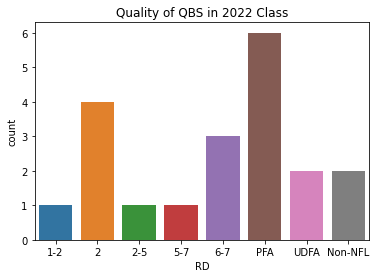

In [42]:
sns.countplot(data=Qb_2022 , x='RD' )
plt.title('Quality of QBS in 2022 Class')

###  You can see there is no top-tier Talent but there is a lot of quarterbacks you can pick up later in the draft.

Text(0.5, 1.0, 'Quality of QBS in 2021 Class')

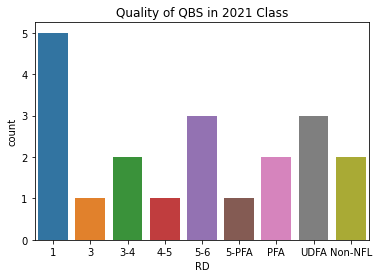

In [43]:
sns.countplot(data=Qb_2021 , x='RD' )
plt.title('Quality of QBS in 2021 Class')

### The hype is Real !! there is a plethora of top tier quarterbacks

Text(0.5, 1.0, 'Quality of QBS in 2020 Class')

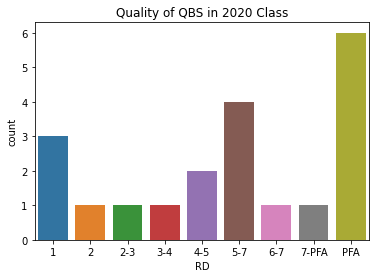

In [44]:
sns.countplot(data=Qb_2020 , x='RD' )
plt.title('Quality of QBS in 2020 Class')

### There is a lot of priority free agents also there three first-round quarterbacks

## We can see why there is a hype on the 2021 class, compared to the rest it has five round 1 quarterbacks probably that is an outlier that will happen once in a blue moon

Text(0.5, 1.0, 'Potential in terms of impact of QBS in 2022 class')

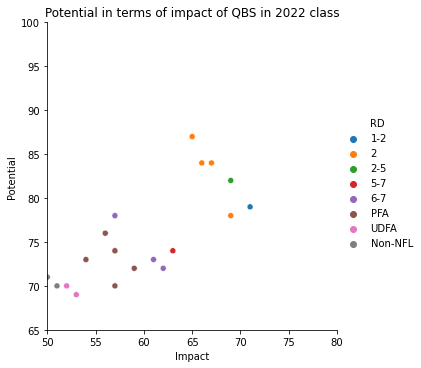

In [45]:
sns.relplot(y="POT", x="IMP" , hue='RD',data=Qb_2022)
plt.xlim(50, 80)
plt.ylim(65, 100)
plt.xlabel('Impact')
plt.ylabel('Potential')
plt.title('Potential in terms of impact of QBS in 2022 class')

### We can say that the 2022 draft class was the weakest we seen in recent memory

Text(0.5, 1.0, 'Potential in terms of impact of QBS in 2021 class')

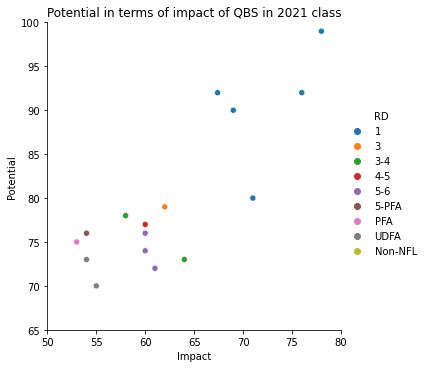

In [46]:
sns.relplot(y="POT", x="IMP" , hue='RD',data=Qb_2021)
plt.xlim(50, 80)
plt.ylim(65, 100)
plt.xlabel('Impact')
plt.ylabel('Potential')
plt.title('Potential in terms of impact of QBS in 2021 class')

### We can see that five quarterbacks have established themselves as the best in the class in terms of impact, and four of the five QBS have enormous potential (Mac is the excluded player out of the five quarterbacks)

Text(0.5, 1.0, 'Potential in terms of impact of QBS in 2020 class')

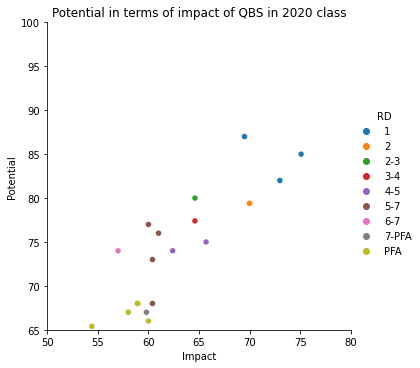

In [47]:
sns.relplot(y="POT", x="IMP" , hue='RD',data=Qb_2020)
plt.xlim(50, 80)
plt.ylim(65, 100)
plt.xlabel('Impact')
plt.ylabel('Potential')
plt.title('Potential in terms of impact of QBS in 2020 class')

## We can See Clearly that's the potential and impact of a player are proportionate to the round they get picked in

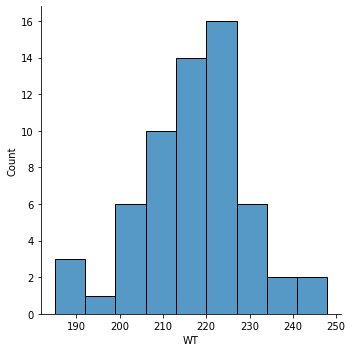

In [48]:
sns.displot(df['WT'])

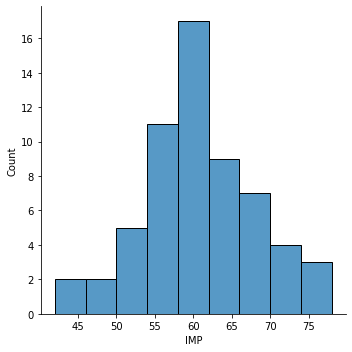

In [49]:
sns.displot(df['IMP'])

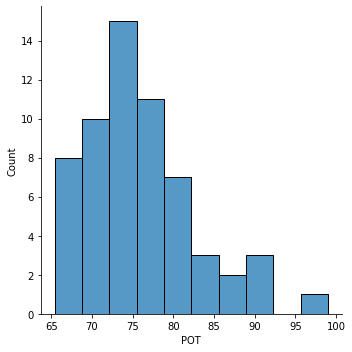

In [50]:
sns.displot(df['POT'])

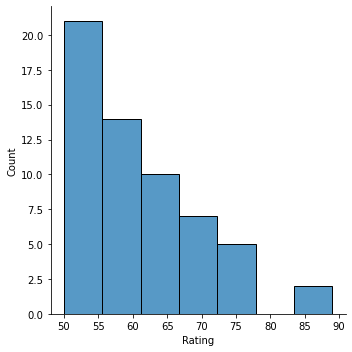

In [51]:
sns.displot(df['Rating'])

Text(0.5, 1.0, 'Impact in terms of DEC & PRS for QBS in 2022 class')

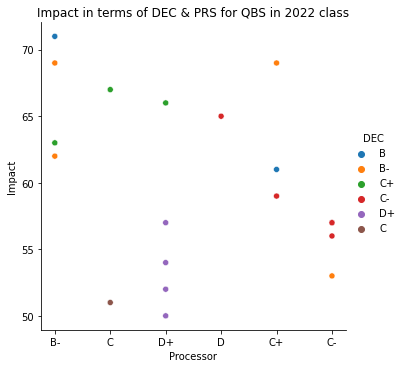

In [52]:
sns.relplot(y="IMP", x="PRS" , hue='DEC' ,data=Qb_2022)

plt.xlabel('Processor')
plt.ylabel('Impact')
plt.title('Impact in terms of DEC & PRS for QBS in 2022 class')

Text(0.5, 1.0, 'Impact in terms of DEC & PRS for QBS in 2021 class')

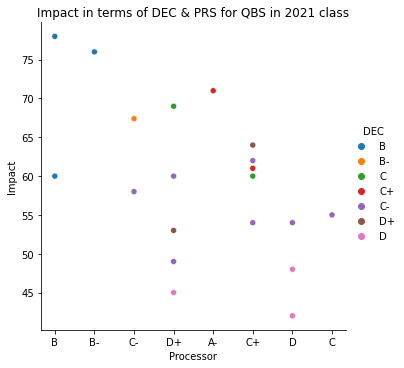

In [53]:
sns.relplot(y="IMP", x="PRS" , hue='DEC' ,data=Qb_2021)

plt.xlabel('Processor')
plt.ylabel('Impact')
plt.title('Impact in terms of DEC & PRS for QBS in 2021 class')

Text(0.5, 1.0, 'Impact in terms of DEC & PRS for QBS in 2022 class')

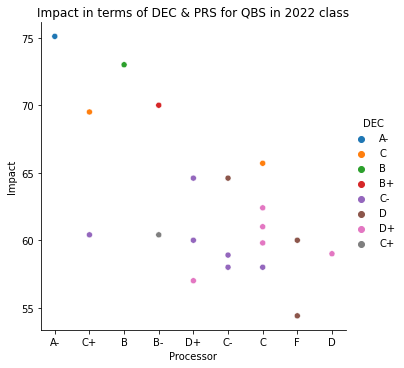

In [54]:
sns.relplot(y="IMP", x="PRS" , hue='DEC' ,data=Qb_2020)

plt.xlabel('Processor')
plt.ylabel('Impact')
plt.title('Impact in terms of DEC & PRS for QBS in 2022 class')

## Based on the three draft classes we can say if a QB has a good Processor and decision making he will have a good Impact 

Text(0.5, 1.0, 'POT of the QBs in trams of draft captal ')

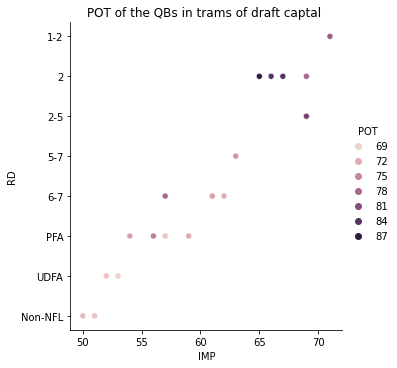

In [55]:
sns.relplot(y="RD", x="IMP", hue="POT", data=Qb_2022)


plt.title('POT of the QBs in trams of draft captal ')

Text(0.5, 1.0, 'POT of the QBs in trams of draft captal ')

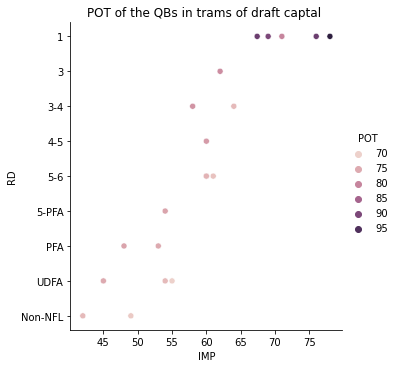

In [56]:
sns.relplot(y="RD", x="IMP", hue="POT", data=Qb_2021)


plt.title('POT of the QBs in trams of draft captal ')

Text(0.5, 1.0, 'POT of the QBs in trams of draft captal ')

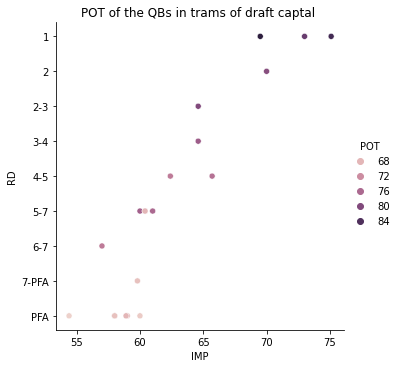

In [57]:
sns.relplot(y="RD", x="IMP", hue="POT", data=Qb_2020)


plt.title('POT of the QBs in trams of draft captal ')

<AxesSubplot:xlabel='PRS', ylabel='IMP'>

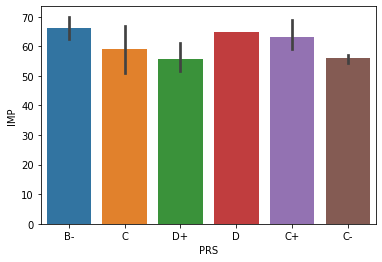

In [58]:
sns.barplot(data=Qb_2022 , y='IMP' , x='PRS')

<AxesSubplot:xlabel='DEC', ylabel='IMP'>

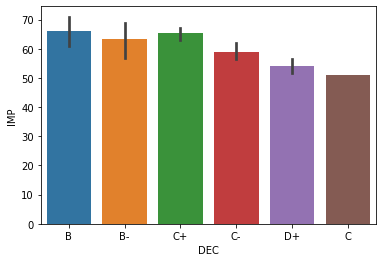

In [59]:
sns.barplot(data=Qb_2022 , y='IMP' , x='DEC')

<AxesSubplot:xlabel='PKS', ylabel='IMP'>

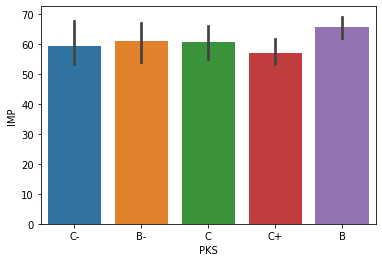

In [60]:
sns.barplot(data=Qb_2022 , y='IMP' , x='PKS')

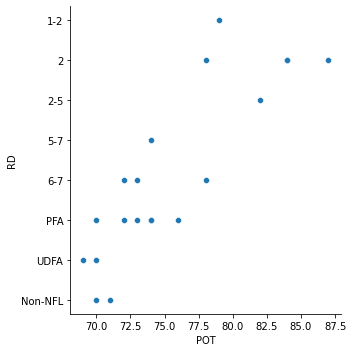

In [61]:
sns.relplot(y="RD", x="POT",data=Qb_2022)

# Feature Engineering

In [62]:
df

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,DEC,PKS,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating
0,7.0,Nate Stanley,6'4,243.0,SR,Iowa,68.80,65.7,75.0,4-5,...,C,C+,C+,B,74.0,74.0,81.0,"Stanley is a big, traditional pocket passer wi...",No,58.0
1,9.0,Steven Montez,6'5,230.0,SR (RS),Colorado,66.00,61.0,76.0,5-7,...,D+,B,B,A,79.0,81.0,86.0,Higher upside QB with plus physical tools. Has...,No,50.0
2,4.0,Justin Fields,6'3,227.0,JR,Ohio State,6.51,69.0,90.0,1,...,C,B-,A-,B,88.0,86.0,89.0,Fields is a typical boom or bust 1st Round Qua...,No,74.0
3,16.0,Shea Patterson,6'2,208.0,SR (TR),Michigan,62.00,60.0,66.0,PFA,...,C-,C-,C+,A,83.0,85.0,88.0,"Patterson has a nice, mobile skillset similar ...",No,50.0
4,13.0,Brady White,6'3,215.0,SR (TR),Memphis,5.65,54.0,76.0,5-PFA,...,C-,C+,B-,B,85.0,83.0,87.0,White is an explosive gunslinger with a live a...,No,55.0
5,2.0,Zach Wilson,6'2,213.0,JR,BYU,7.10,76.0,92.0,1,...,B,A+,A,A+,82.0,86.0,90.0,Wilson is a fluid athlete with a confident pro...,No,74.0
6,9.0,Chase Garbers,6'2,225.0,SR (RS),California,5.90,61.0,73.0,6-7,...,B,B-,C+,B,82.0,77.0,80.0,Garbers is a likely career backup due to a not...,No,61.0
7,17.0,Collin Hill,6'4,213.0,SR (GR),South Carolina,5.15,54.0,73.0,UDFA,...,C-,B-,C+,B-,73.0,72.0,80.0,Hill transferred to the SEC after losing his S...,No,50.0
8,4.0,Jake Fromm,6'2,220.0,JR,Georgia,73.10,70.0,79.4,2,...,B+,A,A-,A+,78.0,81.0,86.0,"Smart, humble young prospect with an ideal mod...",No,60.0
9,18.0,KJ Costello,6'5,225.0,SR (TR),Mississippi St,5.00,45.0,75.0,UDFA,...,D,D+,D,C-,69.0,62.0,68.0,Costello is a gigantic pocket passer who comma...,No,50.0


## We decided to classifieds School columns to big school or not because mostly players come from big schools in that position


In [63]:
# List of the best football progams in the NCAA
big_schools = [
    
    'Texas','Clemson','Notre Dame','Ohio State','LSU','Florida',
    'Georgia','Alabama','South Carolina','Florida State','Oklahoma'
    
              ]

In [64]:
# to check if the school inside the list of big schools 
in_big_schools = df['School'].isin(big_schools)

In [65]:
# Create a new feature word_count
df['School'] = in_big_schools

In [66]:
# Renaming the columns to make them more easily identifiable
df.rename(columns = {
    
                    'School':'Big Program'
                 },
          
          
               inplace = True)

In [67]:


# import required libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder



categories = ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F',]

# generate values using Ordinal Encoder ordering the vaules based on the provided list
oe = OrdinalEncoder(categories = [['1','1-2','2','2-3','2-4','2-5','3','3-4','3-5','4','4-5','4-6','4-7','5','5-6','5-7',
                                   '5-PFA','6','6-7','7','7-PFA','PFA','UDFA','Non-NFL']
                                  ,categories
                                  ,categories
                                  ,categories
                                  ,categories
                                  ,categories
                                  ,categories
                                  ,categories
                                  ,categories
                                  ,categories])


# assigning the features to the values
df[['RD','ARM','IAC','QAC','OPA','PRS','DEC','PKS','PEX','REL']] = oe.fit_transform(df[['RD','ARM','IAC','QAC','OPA',
                                                                                        'PRS','DEC','PKS','PEX','REL']])


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ranking         60 non-null     float64
 1   Name            60 non-null     object 
 2   HT              60 non-null     object 
 3   WT              60 non-null     float64
 4   Class           60 non-null     object 
 5   Big Program     60 non-null     bool   
 6   OVR             60 non-null     float64
 7   IMP             60 non-null     float64
 8   POT             60 non-null     float64
 9   RD              60 non-null     float64
 10  Scheme          60 non-null     object 
 11  ARM             60 non-null     float64
 12  QAC             60 non-null     float64
 13  IAC             60 non-null     float64
 14  OPA             60 non-null     float64
 15  PRS             60 non-null     float64
 16  DEC             60 non-null     float64
 17  PKS             60 non-null     float

In [69]:
# generate binary values using get_dummies
df = pd.get_dummies(df, columns=['Injury History'], drop_first=True, prefix='Inj_History')

df = pd.get_dummies(df, columns=['Big Program'], drop_first=True, prefix='Big_Program')

In [70]:
df.head(1)

,Ranking,Name,HT,WT,Class,OVR,IMP,POT,RD,Scheme,...,PKS,PEX,REL,SPD,COD,ACC,Description,Rating,Inj_History_Yes,Big_Program_True
0,7.0,Nate Stanley,6'4,243.0,SR,68.8,65.7,75.0,10.0,Pro Style,...,6.0,6.0,4.0,74.0,74.0,81.0,"Stanley is a big, traditional pocket passer wi...",58.0,0,0


In [71]:
# use apply and lambda to konw the number of words in the Description for each player 
num_words_in_Description = df.apply(
         lambda row:  len(row['Description']),
         axis=1)

# Create a new feature word_count
df['Word_count'] = num_words_in_Description
print(df)

    Ranking               Name      HT     WT       Class    OVR   IMP   POT  \
0       7.0       Nate Stanley     6'4  243.0          SR  68.80  65.7  75.0   
1       9.0      Steven Montez     6'5  230.0     SR (RS)  66.00  61.0  76.0   
2       4.0      Justin Fields     6'3  227.0          JR   6.51  69.0  90.0   
3      16.0     Shea Patterson     6'2  208.0     SR (TR)  62.00  60.0  66.0   
4      13.0        Brady White     6'3  215.0     SR (TR)   5.65  54.0  76.0   
5       2.0        Zach Wilson     6'2  213.0          JR   7.10  76.0  92.0   
6       9.0      Chase Garbers     6'2  225.0     SR (RS)   5.90  61.0  73.0   
7      17.0        Collin Hill     6'4  213.0     SR (GR)   5.15  54.0  73.0   
8       4.0         Jake Fromm     6'2  220.0          JR  73.10  70.0  79.4   
9      18.0        KJ Costello     6'5  225.0     SR (TR)   5.00  45.0  75.0   
10     19.0     Chris Oladokun     6'2  200.0     SR (GR)   4.90  50.0  71.0   
11      1.0    Trevor Lawrence     6'6  

## Now we will see the readability score of the text in the Description feature      

In [72]:
# Import Textatistic
from textatistic import Textatistic

# adding a new column with the readability scores of the text using textatistic flesch_score  
df['Flesch_Score'] = df['Description'].apply(lambda x: (Textatistic(x).scores) ['flesch_score'])

In [73]:
df.describe()

,Ranking,WT,OVR,IMP,POT,RD,ARM,QAC,IAC,OPA,...,PEX,REL,SPD,COD,ACC,Rating,Inj_History_Yes,Big_Program_True,Word_count,Flesch_Score
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,59.000000,60.000000,60.000000,60.000000,60.000000
mean,10.500000,216.016667,25.915500,60.570000,75.953333,13.283333,4.566667,5.266667,6.816667,5.166667,...,5.616667,4.383333,80.200000,78.650000,83.133333,60.338983,0.050000,0.233333,874.100000,68.606665
std,5.814943,12.050025,28.930606,7.492398,6.958411,8.563010,2.410195,1.876407,2.029375,1.718954,...,2.108029,2.649539,4.704127,5.937028,4.938492,9.715984,0.219784,0.426522,447.266602,8.041873
min,1.000000,185.000000,4.400000,42.000000,65.400000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,69.000000,62.000000,68.000000,50.000000,0.000000,0.000000,307.000000,40.903607
25%,5.750000,209.500000,5.587500,56.750000,71.750000,4.500000,3.000000,4.000000,6.000000,4.000000,...,5.000000,3.000000,76.000000,74.000000,79.750000,50.000000,0.000000,0.000000,546.750000,63.813258
50%,10.500000,215.000000,6.235000,60.000000,74.500000,15.000000,4.000000,5.000000,7.000000,6.000000,...,6.000000,4.000000,81.500000,79.500000,84.500000,59.000000,0.000000,0.000000,771.500000,68.679923
75%,15.250000,223.250000,62.000000,65.175000,79.000000,21.000000,6.250000,7.000000,8.000000,6.000000,...,6.250000,6.250000,84.000000,83.000000,87.000000,65.500000,0.000000,0.000000,1062.750000,72.945077
max,20.000000,248.000000,78.400000,78.000000,99.000000,23.000000,10.000000,9.000000,11.000000,8.000000,...,10.000000,10.000000,89.000000,89.000000,90.000000,89.000000,1.000000,1.000000,2387.000000,90.330714


## We can observe what the mean of the readability score is 68.6 which 13 to 15 year olds can understand the description
<img src="Flesch.jpg." width="800" height="400">


In [74]:
df.head()

,Ranking,Name,HT,WT,Class,OVR,IMP,POT,RD,Scheme,...,REL,SPD,COD,ACC,Description,Rating,Inj_History_Yes,Big_Program_True,Word_count,Flesch_Score
0,7.0,Nate Stanley,6'4,243.0,SR,68.80,65.7,75.0,10.0,Pro Style,...,4.0,74.0,74.0,81.0,"Stanley is a big, traditional pocket passer wi...",58.0,0,0,1287,64.295242
1,9.0,Steven Montez,6'5,230.0,SR (RS),66.00,61.0,76.0,15.0,Play Action / Spread,...,1.0,79.0,81.0,86.0,Higher upside QB with plus physical tools. Has...,50.0,0,0,1042,71.059792
2,4.0,Justin Fields,6'3,227.0,JR,6.51,69.0,90.0,0.0,Spread / Play Action,...,4.0,88.0,86.0,89.0,Fields is a typical boom or bust 1st Round Qua...,74.0,0,1,1838,68.888214
3,16.0,Shea Patterson,6'2,208.0,SR (TR),62.00,60.0,66.0,21.0,Play Action,...,1.0,83.0,85.0,88.0,"Patterson has a nice, mobile skillset similar ...",50.0,0,0,928,63.120196
4,13.0,Brady White,6'3,215.0,SR (TR),5.65,54.0,76.0,16.0,Play Action / Spread,...,4.0,85.0,83.0,87.0,White is an explosive gunslinger with a live a...,55.0,0,0,540,68.913750


In [75]:
# Remove stopwords for the dataframe 
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Description'] = df['Description'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df.head(1)


,Ranking,Name,HT,WT,Class,OVR,IMP,POT,RD,Scheme,...,REL,SPD,COD,ACC,Description,Rating,Inj_History_Yes,Big_Program_True,Word_count,Flesch_Score
0,7.0,Nate Stanley,6'4,243.0,SR,68.8,65.7,75.0,10.0,Pro Style,...,4.0,74.0,74.0,81.0,"Stanley big, traditional pocket passer upside....",58.0,0,0,1287,64.295242


In [76]:
# Remove stopwords for the QB_2022 dataframe 
from nltk.corpus import stopwords
stop = stopwords.words('english')
Qb_2022['Description'] = Qb_2022['Description'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
Qb_2022.head(1)


,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,DEC,PKS,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating
0,1,Kenny Pickett,6'3,217,SR (RS),Pittsburgh,6.35,71,79,1-2,...,B,C-,B+,B+,84,82,86,Pickett projects nicely mid tier Quarterback b...,No,71


In [77]:
# Remove stopwords for the QB_2021 dataframe 
from nltk.corpus import stopwords
stop = stopwords.words('english')
Qb_2021['Description'] = Qb_2021['Description'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
Qb_2021.head(1)


,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,DEC,PKS,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating
0,1.0,Trevor Lawrence,6'6,215.0,JR,Clemson,7.18,78.0,99.0,1,...,B,B-,A-,A-,87.0,76.0,82.0,Lawrence true generational talent Quarterback ...,No,76.0


In [78]:
# Remove stopwords for the QB_2020 dataframe 
from nltk.corpus import stopwords
stop = stopwords.words('english')
Qb_2020['Description'] = Qb_2020['Description'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
Qb_2020.head(1)


,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,DEC,PKS,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,1,...,A-,A-,A,A,82.0,83.0,90.0,"Burrow confident, quick twitch gunslinger type...",No,89.0


In [79]:
import spacy

# Loading the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 1027203

# Generate tokens and POS tags
pos = df['Description'].apply(lambda x: ([(token.text, token.pos_) for token in nlp(x)]))


                             
print(pos.head())

0    [(Stanley, PROPN), (big, ADJ), (,, PUNCT), (tr...
1    [(Higher, ADJ), (upside, ADJ), (QB, PROPN), (p...
2    [(Fields, NOUN), (typical, ADJ), (boom, NOUN),...
3    [(Patterson, PROPN), (nice, ADJ), (,, PUNCT), ...
4    [(White, ADJ), (explosive, ADJ), (gunslinger, ...
Name: Description, dtype: object


In [80]:
# Returns the number of word type 
def wordtype(text,WordType, model=nlp ):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos_A = [token.pos_ for token in doc]
    
    # Return number of word type
    return pos_A.count(WordType)


In [81]:
# casting the pos to str 
pos = ' '.join([str(item) for item in pos])
print(wordtype(pos, 'VERB', nlp)) # you can try any type like PROPN or Noun.ect


887


In [82]:
pos


'[(\'Stanley\', \'PROPN\'), (\'big\', \'ADJ\'), (\',\', \'PUNCT\'), (\'traditional\', \'ADJ\'), (\'pocket\', \'NOUN\'), (\'passer\', \'ADJ\'), (\'upside\', \'NOUN\'), (\'.\', \'PUNCT\'), (\'Stanley\', \'PROPN\'), (\'great\', \'ADJ\'), (\'kid\', \'NOUN\'), (\'instills\', \'NOUN\'), (\'confidence\', \'NOUN\'), (\'heading\', \'VERB\'), (\'next\', \'ADJ\'), (\'level\', \'NOUN\'), (\'given\', \'VERB\'), (\'significant\', \'ADJ\'), (\'development\', \'NOUN\'), (\'performance\', \'NOUN\'), (\'end\', \'NOUN\'), (\'college\', \'NOUN\'), (\'career\', \'NOUN\'), (\'.\', \'PUNCT\'), (\'As\', \'ADP\'), (\'three\', \'NUM\'), (\'-\', \'PUNCT\'), (\'year\', \'NOUN\'), (\'starter\', \'ADJ\'), (\'Big\', \'PROPN\'), (\'10\', \'NUM\'), (\',\', \'PUNCT\'), (\'Stanley\', \'PROPN\'), (\'confident\', \'ADJ\'), (\'processor\', \'NOUN\'), (\'average\', \'ADJ\'), (\'rookie\', \'NOUN\'), (\'far\', \'ADV\'), (\'recognizing\', \'VERB\'), (\'coverages\', \'NOUN\'), (\'concerned\', \'VERB\'), (\'.\', \'PUNCT\'), (\'T

In [83]:
# Generate tokens and POS tags for each description

df['POS_Description'] = df['Description'].apply(lambda x: ([(token.text, token.pos_) for token in nlp(x)]))

In [84]:
# counting how many verbs in each description

df['Adjective_count'] = df['POS_Description'].apply(lambda x: ([wordtype((' '.join([str(item) for item in x])), 'VERB', nlp)]))

In [88]:
df

,Ranking,Name,HT,WT,Class,OVR,IMP,POT,RD,Scheme,...,COD,ACC,Description,Rating,Inj_History_Yes,Big_Program_True,Word_count,Flesch_Score,POS_Description,Adjective_count
0,7.0,Nate Stanley,6'4,243.0,SR,68.80,65.7,75.0,10.0,Pro Style,...,74.0,81.0,"Stanley big, traditional pocket passer upside....",58.0,0,0,1287,64.295242,"[(Stanley, PROPN), (big, ADJ), (,, PUNCT), (tr...",[18]
1,9.0,Steven Montez,6'5,230.0,SR (RS),66.00,61.0,76.0,15.0,Play Action / Spread,...,81.0,86.0,Higher upside QB plus physical tools. Has outs...,50.0,0,0,1042,71.059792,"[(Higher, ADJ), (upside, ADJ), (QB, PROPN), (p...",[16]
2,4.0,Justin Fields,6'3,227.0,JR,6.51,69.0,90.0,0.0,Spread / Play Action,...,86.0,89.0,Fields typical boom bust 1st Round Quarterback...,74.0,0,1,1838,68.888214,"[(Fields, NOUN), (typical, ADJ), (boom, NOUN),...",[37]
3,16.0,Shea Patterson,6'2,208.0,SR (TR),62.00,60.0,66.0,21.0,Play Action,...,85.0,88.0,"Patterson nice, mobile skillset similar high l...",50.0,0,0,928,63.120196,"[(Patterson, PROPN), (nice, ADJ), (,, PUNCT), ...",[22]
4,13.0,Brady White,6'3,215.0,SR (TR),5.65,54.0,76.0,16.0,Play Action / Spread,...,83.0,87.0,White explosive gunslinger live arm. The game ...,55.0,0,0,540,68.913750,"[(White, ADJ), (explosive, ADJ), (gunslinger, ...",[8]
5,2.0,Zach Wilson,6'2,213.0,JR,7.10,76.0,92.0,0.0,Any,...,86.0,90.0,Wilson fluid athlete confident processor gunsl...,74.0,0,0,1774,57.179386,"[(Wilson, PROPN), (fluid, NOUN), (athlete, NOU...",[21]
6,9.0,Chase Garbers,6'2,225.0,SR (RS),5.90,61.0,73.0,18.0,Spread,...,77.0,80.0,Garbers likely career backup due notable lack ...,61.0,0,0,926,70.350303,"[(Garbers, NOUN), (likely, ADJ), (career, NOUN...",[18]
7,17.0,Collin Hill,6'4,213.0,SR (GR),5.15,54.0,73.0,22.0,Spread,...,72.0,80.0,Hill transferred SEC losing Senior season due ...,50.0,0,1,591,68.471631,"[(Hill, PROPN), (transferred, VERB), (SEC, PRO...",[12]
8,4.0,Jake Fromm,6'2,220.0,JR,73.10,70.0,79.4,2.0,Play Action / Spread,...,81.0,86.0,"Smart, humble young prospect ideal modern skil...",60.0,0,1,1254,70.522658,"[(Smart, ADJ), (,, PUNCT), (humble, ADJ), (you...",[20]
9,18.0,KJ Costello,6'5,225.0,SR (TR),5.00,45.0,75.0,22.0,Spead / Pro Style,...,62.0,68.0,Costello gigantic pocket passer commands ball ...,50.0,0,0,371,90.330714,"[(Costello, PROPN), (gigantic, ADJ), (pocket, ...",[4]


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ranking           60 non-null     float64
 1   Name              60 non-null     object 
 2   HT                60 non-null     object 
 3   WT                60 non-null     float64
 4   Class             60 non-null     object 
 5   OVR               60 non-null     float64
 6   IMP               60 non-null     float64
 7   POT               60 non-null     float64
 8   RD                60 non-null     float64
 9   Scheme            60 non-null     object 
 10  ARM               60 non-null     float64
 11  QAC               60 non-null     float64
 12  IAC               60 non-null     float64
 13  OPA               60 non-null     float64
 14  PRS               60 non-null     float64
 15  DEC               60 non-null     float64
 16  PKS               60 non-null     float64
 17 

In [90]:
df = df.fillna(50)

In [109]:
# selecting rows based on condition

top_3 = ['1','2','3','1.0','2.0','3.0']

df_top3_picks = df[df['Ranking'] < 4 ]

In [110]:
df_top3_picks

,Ranking,Name,HT,WT,Class,OVR,IMP,POT,RD,Scheme,...,COD,ACC,Description,Rating,Inj_History_Yes,Big_Program_True,Word_count,Flesch_Score,POS_Description,Adjective_count
5,2.0,Zach Wilson,6'2,213.0,JR,7.10,76.0,92.0,0.0,Any,...,86.0,90.0,Wilson fluid athlete confident processor gunsl...,74.0,0,0,1774,57.179386,"[(Wilson, PROPN), (fluid, NOUN), (athlete, NOU...",[21]
11,1.0,Trevor Lawrence,6'6,215.0,JR,7.18,78.0,99.0,0.0,Any,...,76.0,82.0,Lawrence true generational talent Quarterback ...,76.0,0,1,1497,62.572846,"[(Lawrence, PROPN), (true, ADJ), (generational...",[24]
34,1.0,Kenny Pickett,6'3,217.0,SR (RS),6.35,71.0,79.0,1.0,Any,...,82.0,86.0,Pickett projects nicely mid tier Quarterback b...,71.0,0,0,566,57.866176,"[(Pickett, PROPN), (projects, NOUN), (nicely, ...",[7]
35,3.0,Sam Howell,6'0,220.0,JR,6.27,67.0,84.0,2.0,Play Action / Spread,...,82.0,88.0,Howell erratic Quarterback who’s poor surround...,67.0,0,0,1030,61.254213,"[(Howell, PROPN), (erratic, ADJ), (Quarterback...",[17]
38,3.0,Trey Lance,6'3,223.0,JR,6.52,67.4,92.0,0.0,Pro Style / Play Action,...,84.0,89.0,"Trey Lance polarizing, young athlete Quarterba...",70.0,0,0,1483,73.669228,"[(Trey, ADJ), (Lance, PROPN), (polarizing, NOU...",[28]
42,2.0,Jordan Love,6'4,225.0,JR (RS),75.30,69.5,87.0,0.0,Any,...,85.0,87.0,Smooth athlete exceptional arm talent hungry p...,71.0,0,0,984,72.671695,"[(Smooth, ADJ), (athlete, NOUN), (exceptional,...",[17]
45,1.0,Joe Burrow,6'4,216.0,SR (RS),78.40,75.1,85.0,0.0,Any,...,83.0,90.0,"Burrow confident, quick twitch gunslinger type...",89.0,0,1,992,73.310620,"[(Burrow, PROPN), (confident, ADJ), (,, PUNCT)...",[13]
49,3.0,Tua Tagovailoa +,6'1,219.0,JR,74.20,73.0,82.0,0.0,Play Action / Pro Style,...,81.0,85.0,Quick minded athlete solid arm exceptional acc...,73.0,1,1,1301,61.712321,"[(Quick, ADJ), (minded, ADJ), (athlete, NOUN),...",[19]
52,2.0,Desmond Ridder,6'3,207.0,SR (RS),6.30,69.0,78.0,2.0,Any,...,83.0,87.0,Ridder quick operating point guard style Quart...,69.0,0,0,601,52.795000,"[(Ridder, PROPN), (quick, ADJ), (operating, NO...",[8]


In [111]:
df_last3_picks = df[df['Ranking'] > 17 ]

In [112]:
df_last3_picks

,Ranking,Name,HT,WT,Class,OVR,IMP,POT,RD,Scheme,...,COD,ACC,Description,Rating,Inj_History_Yes,Big_Program_True,Word_count,Flesch_Score,POS_Description,Adjective_count
9,18.0,KJ Costello,6'5,225.0,SR (TR),5.0,45.0,75.0,22.0,Spead / Pro Style,...,62.0,68.0,Costello gigantic pocket passer commands ball ...,50.0,0,0,371,90.330714,"[(Costello, PROPN), (gigantic, ADJ), (pocket, ...",[4]
10,19.0,Chris Oladokun,6'2,200.0,SR (GR),4.9,50.0,71.0,23.0,Play Action,...,84.0,86.0,Oladokun camp arm level prospect interesting a...,50.0,0,0,313,40.903607,"[(Oladokun, ADJ), (camp, NOUN), (arm, NOUN), (...",[4]
12,20.0,Kelly Bryant,6'4,220.0,SR (TR),58.1,54.4,65.4,21.0,Play Action,...,82.0,86.0,Bryant good athlete concerningly raw quarterba...,50.0,0,0,688,64.183754,"[(Bryant, ADJ), (good, ADJ), (athlete, NOUN), ...",[9]
18,20.0,McKenzie Milton +,5'10,190.0,SR (RS x2),4.8,51.0,70.0,23.0,Spread,...,82.0,84.0,Milton great story feels though football journ...,51.0,1,1,410,65.842620,"[(Milton, PROPN), (great, ADJ), (story, NOUN),...",[7]
28,19.0,Ian Book,6'0,212.0,SR,61.0,58.0,67.0,21.0,Play Action,...,79.0,84.0,Prototypical modern backup type average arm ta...,50.0,0,1,816,69.258382,"[(Prototypical, ADJ), (modern, ADJ), (backup, ...",[11]
31,18.0,Brian Lewerke,6'3,215.0,SR (RS),61.0,58.0,67.0,21.0,Play Action / Spread,...,78.0,84.0,Three year starter average skillset NFL backup...,50.0,0,0,849,73.311750,"[(Three, NUM), (year, NOUN), (starter, NOUN), ...",[16]
39,20.0,Noah Johnson,5'10,199.0,SR (GR),4.4,42.0,73.0,23.0,Play Action,...,78.0,83.0,"*Incomplete eval, film available. Noah Johnson...",50.0,0,0,421,79.602301,"[(*, PUNCT), (Incomplete, ADJ), (eval, NOUN), ...",[8]
47,18.0,D'Eriq King,5'10,195.0,SR (RS x2),5.0,53.0,69.0,22.0,Play Action,...,89.0,90.0,"King high character guy excellent athlete, sim...",53.0,0,0,654,70.404231,"[(King, PROPN), (high, ADJ), (character, NOUN)...",[7]
59,19.0,Zac Thomas,6'1,205.0,SR (RS),4.9,49.0,71.0,23.0,Spread / Play Action,...,82.0,87.0,Thomas tough sell NFL prospect. He funky relea...,50.0,0,0,464,72.931164,"[(Thomas, PROPN), (tough, ADJ), (sell, VERB), ...",[10]


In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range = (3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(df['Description'].values.astype('U'))

# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 sentences in the the description column
print(cv_tri_df.sum().sort_values(ascending=False).head())




### All of the common sentences are all reflected in the dataset as features

    ability sense pressure ----> PKS
    arm talent accuracy    ----> ARM
    pressure extend plays  ----> PEX
    lack arm talent        ----> ARM
    read defenses make     ----> PRS
    
    
### Now we will display a word colud of the most frequent words of the dataset after removing stopwords 

###  What is Word Cloud? is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. 

In [ ]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the Description column
for val in df.Description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# word cloud for the entier datset 

In [ ]:


 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the Description column
for val in Qb_2022.Description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


# word cloud for the 2022 draft class

In [ ]:

 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the Description column 
for val in Qb_2021.Description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
# word cloud for the 2021 draft class

In [ ]:


comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the Description column
for val in Qb_2020.Description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
# word cloud for the 2020 draft class

In [ ]:
from sklearn.model_selection import train_test_split


# Input Features 
x = df.drop(columns=['Rating'], axis=1) 
# Target Feature
y = df['Rating']

In [ ]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=21 )

## To avoid overfitting we will the see the correlation values between the features on the train split only and if we remove a feature we will also remove from the test split therefor the model will generalize better on unseen data.

In [ ]:
corr = X_train.corr()
plt.figure(figsize=(15,11))
sns.heatmap(corr,annot=True , cmap='coolwarm')

In [ ]:
# with the following function we can select highly corrlated features 
# it will remove the first feature that is correated with anything other feature 


def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.9)

In [ ]:
len(set(corr_features))

In [ ]:
corr_features

In [ ]:
# droping colunms of the list of highly correlated features
corr_features.remove('RD')  


## We are not removing the round feature although it's exceeded our threshold, the round feature could play an important role in predicting the rating of a player in a bad draft class a player can be the number one in the ranking but he is a second-round talent therefore in any other draft class he will be in 5th or 7th spot therefore we are dropping the in the ranking column.



## also adding both the 'SPD' & 'COD' with the 'ACC' columns to the list becase the three of them are telling us the same thing with Play Extension 'PLX' with a high correlation with all of them. see cor

In [ ]:
corr_features.add('Ranking','SPD','COD') # The Ranking column has high corrlecion with both the RD and IMP columns therfore we 

In [ ]:
corr_features

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)